In [16]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sn

In [6]:
data = pd.read_excel('Ch3_Demo.xlsx')

In [7]:
data

,y,x1,x2,x3,x4,x5
0,100,20,2,10.0,6,7.600902
1,320,75,3,37.5,9,10.085809
2,125,30,3,15.0,9,8.229511
3,340,70,1,35.0,3,10.077441
4,145,35,3,17.5,9,8.532082
5,327,85,3,42.5,9,10.232611
6,200,60,4,30.0,12,9.392662
7,388,125,1,62.5,3,10.789319
8,421,200,2,100.0,6,11.340950
9,128,33,3,16.5,9,8.348538


<AxesSubplot:>

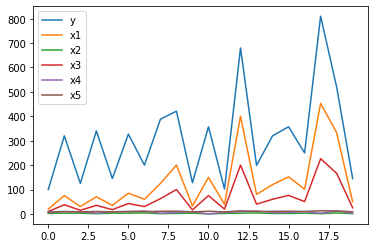

In [13]:
data.plot()

In [8]:
X = data[['x1', 'x5']]
Y = data['y']
X = sm.add_constant(X)
model = sm.OLS(Y, X)

In [9]:
fit = model.fit()

In [10]:
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     181.6
Date:                Thu, 29 Sep 2022   Prob (F-statistic):           3.38e-12
Time:                        11:38:16   Log-Likelihood:                -101.82
No. Observations:                  20   AIC:                             209.6
Df Residuals:                      17   BIC:                             212.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -428.1042    133.319     -3.211      0.0

<AxesSubplot:>

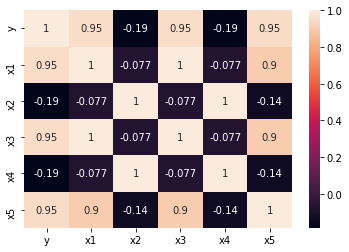

In [21]:
corr = data.corr()
sn.heatmap(corr, annot=True)

In [ ]:
import tkinter as tk
from tkinter import *
import numpy as np
import time
from Patch import *
from Agent import *
from copy import deepcopy


class Checkers():
    def __init__(self, name, dimPatch, cols, rows, simulation):
        self.simulation = simulation
        self.name = name
        self.dimPatch = dimPatch
        self.cols = cols
        self.rows = rows
        self.color_dict = {0: "white", 1: "grey"}
        self.patches_dict = self.create_patches()
        self.agents_dict = self.checkers_agents()
        if not simulation:
            self.parent = Tk()
            canvasWidth = self.cols * self.dimPatch
            canvasHeight = self.rows * self.dimPatch
            self.canvas = Canvas(self.parent,
                                 width=canvasWidth,
                                 height=canvasHeight,
                                 background="white",
                                 name=self.name)
            self.canvas.pack()
            self.draw_patches()
            self.draw_agents(self.agents_dict)
            self.canvas.update()

    def play(self):

        agents_dict = self.agents_dict
        turn = 'black'

        while len(agents_dict[turn]) > 0:
            new_board = self.minimax(self, 2, turn)
            self = new_board

            if turn == 'red':
                turn = 'black'
            else:
                turn = 'red'

            print(f"{turn}'s turn")

            time.sleep(.25)
        time.sleep(5)

    def draw_agents(self, agents_dict):
        for color in agents_dict.keys():
            for agent in agents_dict[color]:
                agent.draw()
        print("agents drawn")

    def create_patches(self):
        patches_dict = {}
        for i in range(self.rows):
            patches_dict[i] = {}
            for j in range(self.cols):
                patches_dict[i][j] = Patch(self, i, j)
        return patches_dict
        print("patches created")

    def draw_patches(self):
        patches_dict = self.patches_dict
        for row in patches_dict.keys():
            for col, patch in patches_dict[row].items():
                patch.image = self.canvas.create_rectangle(
                    col * self.dimPatch,
                    patch.row * self.dimPatch, (patch.col + 1) * self.dimPatch,
                    (patch.row + 1) * self.dimPatch,
                    fill=patch.color)
        print("patches drawn")

    def checkers_agents(self):
        startpos = 1
        agents_dict = {'red': set(), 'black': set()}

        for i in range(0, 3):
            for j in range(startpos, self.rows, 2):
                agents_dict["red"].add(Agent(self, i, j, 'red'))

            if startpos == 0:
                startpos = 1
            else:
                startpos = 0

        for i in range(self.cols - 3, self.cols):
            for j in range(startpos, self.rows, 2):
                agents_dict["black"].add(Agent(self, i, j, 'black'))

            if startpos == 0:
                startpos = 1
            else:
                startpos = 0

        return agents_dict
        print("checkers created")

    def black_left(self, board):
        black_left = 0
        for agent in board.agents_dict.values():
            print(board.agents_dict)
            if agent.color == 'black':
                black_left += 1

        return black_left

    def red_left(self, board):
        red_left = 0
        for agent in board.agents_dict.values():
            print(agent)
            if agent.color == 'red':
                red_left += 1

        return red_left

    def score(self):
        gamescore = {'red': 0, 'black': 0}
        for color in gamescore.keys():
            for agent in self.agents_dict[color]:
                if agent.king:
                    gamescore[color] += 5
                else:
                    gamescore[color] += 3

        #blacks goal will be to maximize reds will be to minimize
        return gamescore['black'] - gamescore['red']

    def minimax(self, board, depth, max_player):
        if depth == 0 or board.red_left(board) == 0 or board.black_left(
                board) == 0:
            return board.score(), board

        print(board.red_left(), board.black_left())

        if max_player:
            maxEval = float('-inf')
            best_move = None
            for move in self.get_all_moves(board, 'black'):
                evaluation = self.minimax(move, depth - 1, False)[0]
                maxEval = max(maxEval, evaluation)
                if maxEval == evaluation:
                    best_move = move

            return maxEval, best_move
        else:
            minEval = float('inf')
            best_move = None
            for move in self.get_all_moves(board, 'red'):
                evaluation = self.minimax(move, depth - 1, True)[0]
                minEval = min(minEval, evaluation)
                if minEval == evaluation:
                    best_move = move

            return minEval, best_move

    def simulate_move(self, agent, move, board):
        agent.move(move[0], move[1])
        return board

    def copy(self):
        new_board = Checkers(self.name, self.dimPatch, self.cols, self.rows,
                             True)
        new_agents_dict = {}
        new_patches_dict = {}
        for i in range(self.rows):
            new_patches_dict[i] = {}
            for j in range(self.cols):
                new_patches_dict[i][j] = Patch(new_board, i, j)
                if self.patches_dict[i][j].agent != None:
                    agent = self.patches_dict[i][j].agent.copy(new_board)
                    new_patches_dict[i][j].agent = agent
                    new_agents_dict[agent.color] = agent

        new_board.patches_dict = new_patches_dict
        new_board.agents_dict = new_agents_dict

        return new_board

    def get_all_moves(self, board, color):
        moves = []
        for agent in self.agents_dict[color]:
            valid_moves = agent.get_moves()
            for move in valid_moves:
                #draw_moves(game, board, piece)
                temp_board = board.copy()
                temp_agent = temp_board.patches_dict[agent.row][
                    agent.col].agent
                new_board = self.simulate_move(temp_agent, move, temp_board)
                moves.append(new_board)

        return moves


class Patch():
    def __init__(self, gui, row, col):
        self.gui = gui
        self.row = row
        self.col = col
        self.agent = None
        self.color = self.gui.color_dict[self.set_color()]

    def set_color(self):
        row, col = self.row, self.col
        row_remainder = row % 2
        col_remainder = col % 2
        total_remainder = row_remainder + col_remainder
        total_remainder = total_remainder % 2
        return total_remainder


class Agent():
    def __init__(self, gui, row, col, color):
        self.gui = gui
        self.row = row
        self.col = col
        self.patch = self.gui.patches_dict[row][col]
        self.patch.agent = self
        self.image = 0
        self.color = color
        self.king = False
        self.move_directions = {
            'red': [(1, 1), (1, -1)],
            'black': [(-1, 1), (-1, -1)],
            'king': [(1, 1), (1, -1), (-1, 1), (-1, -1)]
        }
        self.pdict = self.gui.patches_dict


# recursive moving: if a skip happens, check to see if more skips are avaliable and keep skipping until you can't

    def move(self, dX, dY):
        pdict = self.pdict
        g = self.gui
        self.patch = pdict[self.row][self.col]
        self.patch.agent = None
        if (4 == np.abs(dY) + np.abs(dX)):
            row_0 = self.row
            col_0 = self.col
            row_1 = self.row + dY
            col_1 = self.col + dX
            if (self.valid_move(dX, dY)):
                skip_patch = pdict[(row_0 + row_1) / 2][(col_0 + col_1) / 2]
                #skip_patch = pdict[self.row + dY/2][self.col + dY/2]

                self.row += dY
                self.col += dX
                if not g.simulation:
                    self.move_image(dX, dY)
                skipped_agent = skip_patch.agent
                if not g.simulation:
                    skipped_agent.delete_image()
                self.gui.agents_dict[skipped_agent.color].remove(skipped_agent)
                skip_patch.agent = None
                self.patch = pdict[self.row][self.col]
                self.patch.agent = self
                time.sleep(.2)
                moves = self.get_moves()
                skips = [
                    ele for ele in moves
                    if ele in [(2, 2), (2, -2), (-2, 2), (-2, -2)]
                ]
                if len(skips) > 0:
                    rand_skip = np.random.randint(0, len(skips))
                    move = skips[rand_skip]
                    self.move(move[1], move[0])
                    if not g.simulation:
                        g.canvas.update()

        elif (2 == np.abs(dY) + np.abs(dX)):
            self.row += dY
            self.col += dX
            if not g.simulation:
                self.move_image(dX, dY)

            self.patch = pdict[self.row][self.col]
            self.patch.agent = self

        if ((self.row == 0 and self.color == 'black')
                or (self.row == self.gui.rows - 1 and self.color == 'red')):
            self.king = True

        print("agent moved")

    def get_moves(self):
        move_directions = self.move_directions
        moves = []
        if self.king:
            for dY, dX in move_directions['king']:
                if self.valid_move(dX, dY):
                    moves.append((dX, dY))
                elif self.skippable(dX, dY):
                    moves.append((2 * dX, 2 * dY))

        else:
            for dY, dX in move_directions[self.color]:
                if self.valid_move(dX, dY):
                    moves.append((dX, dY))
                elif self.skippable(dX, dY):
                    moves.append((2 * dX, 2 * dY))
        print(moves)
        return moves

    def skippable(self, dX, dY):
        if self.valid_patch(dX, dY):
            pdict = self.gui.patches_dict
            skip_patch = pdict[self.row + dY][self.col + dX]
            if self.valid_move(2 * dX, 2 * dY):
                landing_patch = pdict[self.row + 2 * dY][self.col + 2 * dX]
                if ((skip_patch.agent != None)
                        and (skip_patch.agent.color != self.color)
                        and (landing_patch.agent == None)):
                    return True
                    print("skippable piece identified")
                else:
                    return False
        else:
            return False

    def draw(self):
        if not self.gui.simulation:
            self.image = self.gui.canvas.create_oval(
                self.col * self.gui.dimPatch,
                self.row * self.gui.dimPatch,
                (self.col + 1) * self.gui.dimPatch,
                (self.row + 1) * self.gui.dimPatch,
                fill=self.color,
                width=0)

    def move_image(self, dX, dY):
        if not self.gui.simulation:
            self.gui.canvas.move(self.image, dX * self.gui.dimPatch,
                                 dY * self.gui.dimPatch)
            self.gui.canvas.update()

    def delete_image(self):
        if not self.gui.simulation:
            self.gui.canvas.delete(self.image)
            self.gui.canvas.update()

    def copy(self, board):
        new_agent = Agent(board, self.row, self.col, self.color)
        return new_agent

    def valid_patch(self, dX, dY):
        if (self.row + dY >= 0 and self.row + dY < self.gui.rows) and (
                self.col + dX >= 0 and self.col + dX < self.gui.cols):
            return True
        else:
            return False

    def valid_move(self, dX, dY):
        if (self.valid_patch(dX, dY)
                and self.gui.patches_dict[self.row + dY][self.col + dX].agent
                == None):
            return True
            print("valid move identified")
        else:
            return False

gui = Checkers("tk Checkers", 50, 8, 8, FALSE)
gui.play()

In [14]:
X = data[['x1']]
Y = data['y']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     182.3
Date:                Thu, 29 Sep 2022   Prob (F-statistic):           7.41e-11
Time:                        11:41:06   Log-Likelihood:                -108.81
No. Observations:                  20   AIC:                             221.6
Df Residuals:                      18   BIC:                             223.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        121.3679     19.277      6.296      0.0

In [19]:
X = data[['x1']]
Y = data['x5']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     x5   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     77.03
Date:                Thu, 29 Sep 2022   Prob (F-statistic):           6.39e-08
Time:                        11:45:03   Log-Likelihood:                -18.972
No. Observations:                  20   AIC:                             41.94
Df Residuals:                      18   BIC:                             43.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.6817      0.216     40.207      0.0